In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy


In [3]:
df = pd.read_csv('shiva_data.csv')
df.head()

,Id,first name,last name,gender,Phone,mail_id,dob,attendance,study hours,maths assignment,...,t2_c,t3_m,t3_p,t3_c,t4_m,t4_p,t4_c,t5_m(calc),t5_p(calc),t5_c(calc)
0,22000,Jared,Hamilton,male,8.613594e+09,Jared_22000@gmail.com,2004-4-12,98.0,6.0,9.0,...,114.0,112.0,113.0,120.0,119.0,114.0,115.0,120.0,112.0,114.0
1,22001,Melissa,Garrison,male,8.400074e+09,Melissa_22001@gmail.com,2004-4-7,95.0,4.0,9.0,...,106.0,105.0,105.0,107.0,110.0,109.0,110.0,106.0,110.0,109.0
2,22002,Tiffany,Hudson,male,9.366186e+09,Tiffany_22002@gmail.com,2004-6-9,88.0,4.0,9.0,...,104.0,103.0,105.0,103.0,103.0,102.0,101.0,105.0,103.0,102.0
3,22003,Kimberly,Kelley,female,8.122489e+09,Kimberly_22003@gmail.com,2004-7-24,85.0,8.0,9.0,...,95.0,98.0,99.0,95.0,97.0,98.0,100.0,98.0,96.0,99.0
4,22004,Kristi,Lawrence,male,7.775091e+09,Kristi_22004@gmail.com,2002-2-21,77.0,2.0,7.0,...,90.0,92.0,90.0,91.0,90.0,90.0,94.0,91.0,91.0,94.0


In [4]:
df.shape

(10000, 32)

In [5]:
def format_data(df, str):
    l='t5_'+str[0]+'(calc)'
    labels = df[l]
    df2=df[['attendance', 'study hours', str+' assignment', str+' viva', 'Parental Involvement', 'Failures', 't1_'+str[0], 't2_'+str[0], 't3_'+str[0], 't4_'+str[0]]]
    X_train, X_test, y_train, y_test = train_test_split(df2, labels, 
                                                            test_size = 0.2,
                                                            random_state=42)
    return X_train, X_test, y_train, y_test

In [9]:
# Evaluate several ml models by training on training set and testing on testing set

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest',
                       'Gradient Boosted', 'DecisionTree', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model6 = GradientBoostingRegressor(n_estimators=20)
    model7 = DecisionTreeRegressor()
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse', 'r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model6, model7]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        
        r2 = r2_score(y_test, predictions) 
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        
#         mae = np.mean(abs(predictions - y_test))
#         rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
#         r2 = r2_score(y_test, ypred)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, r2]
    
    # Mean Value Baseline Metrics
    baseline = np.mean(y_train)
    b2 = [baseline]*len(y_test)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_r2 = r2_score(y_test, b2)
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2]
#     print(baseline_r2)
    return results



In [10]:
def plot_results(results):
    
    figsize(12, 6)
    matplotlib.rcParams['font.size'] = 13
    # Root mean squared error
    ax =  plt.subplot(1, 3, 1)
    results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
    plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

    # Median absolute percentage error
    ax = plt.subplot(1, 3, 2)
    results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
    plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

    # R2 score
    ax =  plt.subplot(1, 3, 3)
    results.sort_values('r2', ascending = True).plot.bar(y = 'r2', color = 'g', ax = ax)
    plt.title('R2 Score'); plt.ylabel('R2');

    plt.tight_layout()


In [11]:

subjects = ['maths', 'physics', 'che']
results = []

for i in range(0, 3):
    X_train, X_test, y_train, y_test = format_data(df, subjects[i])
#     print(X_train.shape)
#     print(X_test.shape)
#     print(y_train.shape)
#     print(y_test.shape)
    results.append(evaluate(X_train, X_test, y_train, y_test))
    


C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+03, tolerance: 7.438e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+03, tolerance: 7.447e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+03,

,mae,rmse,r2
Linear Regression,2.663011,4.64084,0.976161
ElasticNet Regression,2.657253,4.658431,0.97598
Random Forest,2.150263,3.207342,0.988614
Gradient Boosted,4.1217,5.272501,0.96923
DecisionTree,2.7945,4.442691,0.978153
Baseline,25.13884,30.064834,-0.00048


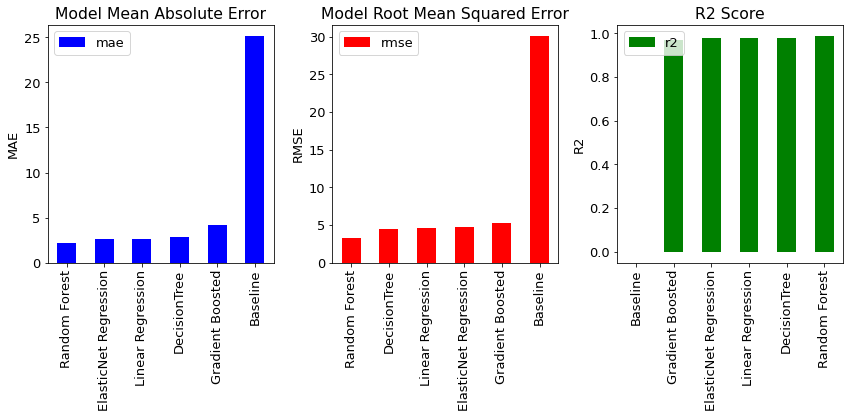

In [12]:
plot_results(results[0])
results[0]


,mae,rmse,r2
Linear Regression,2.6358,4.630726,0.976321
ElasticNet Regression,2.640957,4.654379,0.976079
Random Forest,2.10776,3.127565,0.989199
Gradient Boosted,4.099665,5.272498,0.969303
DecisionTree,2.791,4.441509,0.978217
Baseline,25.122207,30.09951,-0.00042


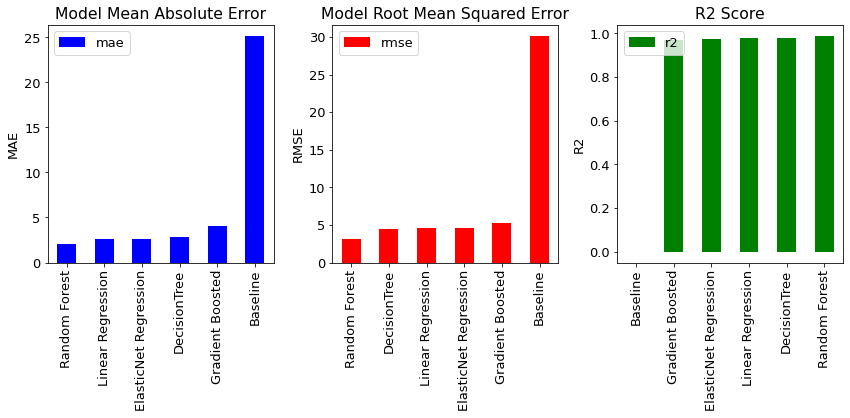

In [13]:
plot_results(results[1])
results[1]


,mae,rmse,r2
Linear Regression,2.627163,4.593863,0.977008
ElasticNet Regression,2.634225,4.628655,0.976659
Random Forest,2.24412,3.331066,0.987911
Gradient Boosted,4.283882,5.526831,0.966721
DecisionTree,2.85,4.548406,0.977461
Baseline,25.302625,30.301813,-0.000348


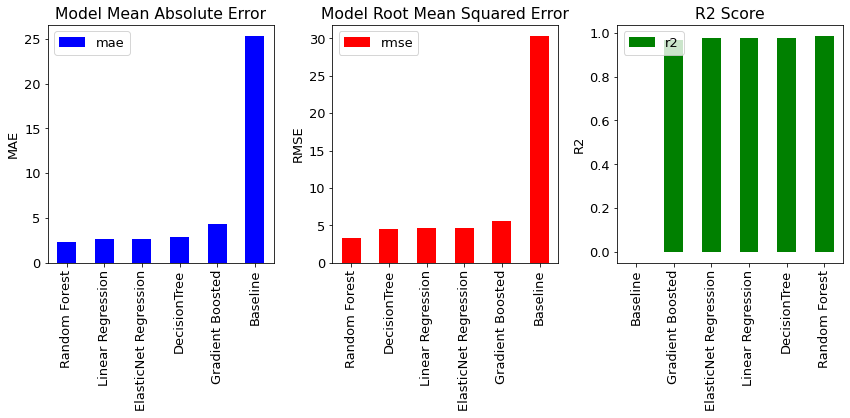

In [14]:
plot_results(results[2])
results[2]


In [15]:



# Names of models
model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'SVM',
                       'Gradient Boosted', 'DecisionTree']

subjects = ['maths', 'physics', 'che']
    
# Instantiate the models
model1 = LinearRegression()
model2 = ElasticNet(alpha=1, l1_ratio=0.5)
model3 = RandomForestRegressor(n_estimators=50)
model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
model6 = GradientBoostingRegressor(n_estimators=20)
model7 = DecisionTreeRegressor()


models=[model1, model2, model3, model5, model6, model7]

# Train and predict with each model
j=0
for model in models:
   print(model_name_list[j])
   j=j+1
   for i in range(0, 3):
        X_train, X_test, y_train, y_test = format_data(df, subjects[i])
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)        
    
        # Metrics
        
        r2 = r2_score(y_test, predictions) 
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        if i==0:
            print('MATHS')
        if i==1:
            print('PHYSICS')
        if i==2:
            print('CHEMISTRY')
        print('\tMean Absolute Error - ',mae)
        print('\tRoot Mean Squared Error - ',rmse)
        print('\tR2 Score - ',r2)
        print()
    
    
    
    
    

Linear Regression
MATHS
	Mean Absolute Error -  2.6630108822500924
	Root Mean Squared Error -  4.640840085978372
	R2 Score -  0.9761612182150605

PHYSICS
	Mean Absolute Error -  2.6358001286559114
	Root Mean Squared Error -  4.630726375658298
	R2 Score -  0.9763210906037622

CHEMISTRY
	Mean Absolute Error -  2.6271627003212634
	Root Mean Squared Error -  4.59386304453514
	R2 Score -  0.9770083598521048

ElasticNet Regression


C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+03, tolerance: 7.438e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+03, tolerance: 7.447e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+03,

MATHS
	Mean Absolute Error -  2.657253403706587
	Root Mean Squared Error -  4.658430934520755
	R2 Score -  0.9759801565353015

PHYSICS
	Mean Absolute Error -  2.6409565249584093
	Root Mean Squared Error -  4.654378966984016
	R2 Score -  0.9760785809567153

CHEMISTRY
	Mean Absolute Error -  2.6342248765531937
	Root Mean Squared Error -  4.6286554931313155
	R2 Score -  0.9766587783875348

Random Forest
MATHS
	Mean Absolute Error -  2.15191
	Root Mean Squared Error -  3.21354752743928
	R2 Score -  0.988569629558742

PHYSICS
	Mean Absolute Error -  2.1224700000000003
	Root Mean Squared Error -  3.156522611989339
	R2 Score -  0.9889977561634364

CHEMISTRY
	Mean Absolute Error -  2.22785
	Root Mean Squared Error -  3.2946586773139335
	R2 Score -  0.9881740857896598

SVM
MATHS
	Mean Absolute Error -  18.205984280587554
	Root Mean Squared Error -  24.67155730572795
	R2 Score -  0.32627296007430795

PHYSICS
	Mean Absolute Error -  18.339576124875943
	Root Mean Squared Error -  24.80984365838745

In [16]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Linear Regression', LinearRegression()))
    level0.append(('ElasticNet Regression', ElasticNet(alpha=1, l1_ratio=0.5)))
    level0.append(('Random Forest', RandomForestRegressor(n_estimators=50)))
    level0.append(('Gradient Boosted', GradientBoostingRegressor(n_estimators=20)))
    level0.append(('DecisionTree', DecisionTreeRegressor()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

model8 = get_stacking()
subjects = ['maths', 'physics', 'che']

for i in range(0, 3):
    X_train, X_test, y_train, y_test = format_data(df, subjects[i])
    model8.fit(X_train, y_train)
    predictions = model.predict(X_test)        
    
        # Metrics
        
    r2 = r2_score(y_test, predictions) 
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    if i==0:
        print('MATHS')
    if i==1:
        print('PHYSICS')
    if i==2:
        print('CHEMISTRY')
    print('\tMean Absolute Error - ',mae)
    print('\tRoot Mean Squared Error - ',rmse)
    print('\tR2 Score - ',r2)
    print()

C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+03, tolerance: 7.438e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.117e+02, tolerance: 5.950e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.115e+02,

MATHS
	Mean Absolute Error -  2.671
	Root Mean Squared Error -  4.199642841956921
	R2 Score -  0.9804783929958334



C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.106e+02, tolerance: 5.942e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.777e+02, tolerance: 5.977e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.637e+02,

PHYSICS
	Mean Absolute Error -  2.8435
	Root Mean Squared Error -  4.392095172010734
	R2 Score -  0.9786986592012625



C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.585e+02, tolerance: 5.962e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.687e+02, tolerance: 5.951e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.412e+02,

CHEMISTRY
	Mean Absolute Error -  2.808
	Root Mean Squared Error -  4.540374433898596
	R2 Score -  0.9775406488408389



In [3]:
df = pd.read_csv('shiva_data.csv')
df2=df[['Id', 'first name', 'attendance', 'study hours', 'maths assignment', 'maths viva','physics assignment', 'physics viva', 'che assignment', 'che viva', 'Parental Involvement', 'Failures', 't1_m', 't1_p', 't1_c', 't2_m', 't2_p', 't2_c', 't3_m', 't3_p', 't3_c', 't4_m', 't4_p', 't4_c' ]]
df2.head()

,Id,first name,attendance,study hours,maths assignment,maths viva,physics assignment,physics viva,che assignment,che viva,...,t1_c,t2_m,t2_p,t2_c,t3_m,t3_p,t3_c,t4_m,t4_p,t4_c
0,22000,Jared,98.0,6.0,9.0,9.0,10.0,9.0,9.0,9.0,...,114.0,117.0,111.0,114.0,112.0,113.0,120.0,119.0,114.0,115.0
1,22001,Melissa,95.0,4.0,9.0,10.0,9.0,9.0,9.0,9.0,...,108.0,108.0,108.0,106.0,105.0,105.0,107.0,110.0,109.0,110.0
2,22002,Tiffany,88.0,4.0,9.0,9.0,8.0,8.0,8.0,8.0,...,104.0,104.0,104.0,104.0,103.0,105.0,103.0,103.0,102.0,101.0
3,22003,Kimberly,85.0,8.0,9.0,9.0,9.0,8.0,9.0,8.0,...,99.0,97.0,96.0,95.0,98.0,99.0,95.0,97.0,98.0,100.0
4,22004,Kristi,77.0,2.0,7.0,8.0,7.0,8.0,7.0,8.0,...,93.0,91.0,94.0,90.0,92.0,90.0,91.0,90.0,90.0,94.0
